In [1]:
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import sys
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import matplotlib.pyplot as plt
import os
from Bio.Align.Applications import ClustalwCommandline
import operator

In [2]:
def alignmentScore(alignment,x,y):
    xaxis=[]
    yaxis=[]
    flag=True
    mismatchCounter=0
    s=''
    for i in range(x-1):
        for j in range(y-1):
            if j!=y-1:
                if alignment[j][i]!=alignment[j+1][i]:
                    for k in range(y):                        
                        s=s+alignment[k, i]
                    ss=s.replace('-', '')
                    if len(ss)>1:
                        if len(set(ss)) != 1:
                            # we print out the mismatch position with adding 1 because gene index statring with 1 not 0
                           
                            xaxis.append(i)
                            yaxis.append(len(s))
                            print(i+1,':',s)
                            mismatchCounter=mismatchCounter+1

                    s=''
                    break

    misatchedScore    = round(mismatchCounter/x*100,1)
    matchedScore = round( (np.size(alignment,1) -mismatchCounter)/x  *100, 1)

    print('\n')
    print ("Mismatched Score =", misatchedScore ,"%", "(", mismatchCounter, " out of ",x ,")")
    print ("Matched Score =", matchedScore ,"%", "(", x-mismatchCounter, " out of ",x ,")") 
    time = [0, 1, 2, 3]

    
    plt.figure(figsize=(17, 5))
    plt.plot(xaxis, yaxis,'ro')
    plt.xlabel('Base position (The red dots show where the diffrence occures in the sequnces)')
    plt.ylabel('Base')
  
    

In [3]:
def mutationPercent(alignment,x,y,RefSeq):
    flag=True
    mismatchCounter=0
    s=''
    mutationsPecrent={}
    for i in range(x-1):
        for j in range(y-1):
            if j!=y-1:
                if alignment[j][i]!=alignment[j+1][i]:
                    for k in range(y):                        
                        s=s+alignment[k, i]
                    ss=s.replace('-', '')
                    if len(ss)>1:
                        if len(set(ss)) != 1:
  #print(i+1,':',s)
                            mutationsPecrent[i+1]=char_frequency(ss,RefSeq[i],y)
                            #print()
                            #print(i+1,char_frequency(s,alignment[0,i],y-1))
                            #mismatchCounter=mismatchCounter+1

                    s=''
                    break
                    
    sort_orders = sorted(mutationsPecrent.items(), key=lambda x: x[1], reverse=True)
    
    for i in sort_orders:
            print(i[0],'>>', i[1],'%')

    


In [4]:
def findConsensus(alignment,x,y):
    
    mismatchCounter=0
    s=''
    concensusnSeq=''
    mutationsPecrent={}
    for i in range(x):
        for j in range(y):           
            s=s+alignment[j, i]
        concensusnSeq+=char_frequency1(s)   
        #print(s)    
        s=''
    return(concensusnSeq)    
  
                    
    


In [5]:
def char_frequency(str1,consensusBase,mutationLen):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
    sum=0
    for i in  dict:
        if(i!=consensusBase):
            sum=sum+dict[i]
    return(  round(sum/mutationLen*100,1))  
#print(char_frequency('google.com'))

In [6]:
def char_frequency1(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
  
    return(max(dict.items(), key=operator.itemgetter(1))[0])  
#print(char_frequency('google.com'))

# German

In [14]:

# Redigne Multialignmet file that we've generated
germanMultiAlignment = AlignIO.read("MiltiAlignment Files\German.aln", "clustal")

print("Alignment length %i" % germanMultiAlignment.get_alignment_length())
print("Samples",np.size(germanMultiAlignment,0)-1,)
print("\n")
for record in germanMultiAlignment:
    print("%s - %s" % (record.seq, record.id))
np.size(germanMultiAlignment,1)
#testAlignment[1,91]

Alignment length 29903
Samples 76


------------------------------------------------------AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAA

29903

### Finding concensus

In [15]:
colum=np.size (germanMultiAlignment,1)
row=np.size (germanMultiAlignment,0)

s=findConsensus(germanMultiAlignment,colum,row)
#print(s[5])
print(findConsensus(germanMultiAlignment,colum,row),'| Consensus')


------------------------------------------------------AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

### Finding mutation

4 : -AAAAAAA-----A--------R------------------------------------------------------
160 : GAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
210 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGKGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
241 : TTCTTCTTTTTTTTTTTTTTTTCTCTTCTTTCTTTTTTCTTTCTTTCTTTTTTTTTTTTTCCYCTTTCCCCCCCCCC
514 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTYTTTTTTTTTTTTTT
658 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTCTCCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
675 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNGGGGGGGGGGGGGGGGGGGGGGGGGGG
682 : TTTTTTTTTTTTTTTTTTTTTTKTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
884 : CCCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
900 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
1059 : TCCCCCCCCCCCCCCCCCCCCCCCCTCCTCTCCCTTCTCTTCCCCTCCTTTTTTTTTTCTCCYCCTCCCCCCCCCCC
1397 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

4878 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNNCCCCCC
4879 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTTTTT
4880 : AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAAAAAA
4881 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNNGGGGGG
4882 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTTTTT
4883 : AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAAAAAA
4884 : AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAAAAAA
4885 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTTTTT
4886 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCNNCCCCCC
4887 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNNCCCCCC
4888 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTTTTT
4889 : AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

5467 : NCCCCCCCCCCCCCCCCCCCCCCNNNNNNCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCNCCCNCC
5468 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNNTTTNTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNTTTNTTTNTT
5469 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNTTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNTTTNTTTNTT
5470 : NGGGGGGGGGGGGGGGGGGGGGGNNNNNGGGGNGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNGGGNGGGNGG
5471 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNNTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNTTTNTTTNTT
5472 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNTTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNTTTNTTTNTT
5473 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNTTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNTTTNTTTNTT
5474 : NCCCCCCCCCCCCCCCCCCCCCCNNNNNCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCNCCCNCC
5475 : NAAAAAAAAAAAAAAAAAAAAAANNNNNAAAANAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAAANAAANAA
5476 : NAAAAAAAAAAAAAAAAAAAAAANNNNNAAAANAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAAANAAANAA
5477 : NCCCCCCCCCCCCCCCCCCCCCCNNNNNCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCNCCCNCC
5478 : NAAAAAAAAAAAAAAAAAAAAAANNNNNAAAANAAAAAAAAAAAAAAAAAAAAAAAAA

5714 : AAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
5861 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGGGGGGGGGGGGGGGG
6228 : AAAAGAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
6362 : GGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
6446 : GGGGGGGGGAGAAAAAAAAGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
7235 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
7392 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCN
7788 : CCCCCCCCCCCCCCCCCCCCCCYCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
7798 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGTGGGGGGGGG
8109 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCYCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
8293 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
8422 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

19839 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
20020 : TTTTTTTTTTTTTTTTTTTTTYTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
20887 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
21137 : AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
21372 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGKGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
21627 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
21635 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCN
21707 : CCCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
22104 : GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNGGGGGGGGGGGGGGGGGGGGGGG
22323 : CCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCTTCCYCCT
22325 : NTTTTTTTTTTTTTTTTTTTTTTNNTNTNTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
22326 : NCCCCCCCCCCCCCCCCCCCCCCNNCNCNCCCNCCCCCCCCCCCCC

22542 : NTTTTTTTTTTTTTTTTTTTTTTNNTNTNTTTNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
22878 : NAAAAAAAAAAAAAAAAAAAAAANNNNNNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAANANAAAA
22879 : NCCCCCCCCCCCCCCCCCCCCCCNNNNNNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNNCCNCNCCCC
22880 : NAAAAAAAAAAAAAAAAAAAAAANNNNNNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAANANAAAA
22881 : NAAAAAAAAAAAAAAAAAAAAAANNNNNNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAANANAAAA
22882 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTNTNTTTT
22883 : NCCCCCCCCCCCCCCCCCCCCCCNNNNNNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNNCCNCNCCCC
22884 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTNTNTTTT
22885 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNNTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTNNTTNTNTTTT
22886 : NGGGGGGGGGGGGGGGGGGGGGGNNNNNNGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNNGGNGNGGGG
22887 : NAAAAAAAAAAAAAAAAAAAAAANNNNNNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANNAANANAAAA
22888 : NTTTTTTTTTTTTTTTTTTTTTTNNNNNNTTTTTTTTTTTTTTTTT

23179 : CCCCCCCYCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
23235 : AAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
23403 : GGAGGAGGGGGGGGGGGGGGGGAGAGGAGGGAGGGGGGAGGGAGGGRGGGGGGGGGGGGGAARAGGGAAAAAAAAAA
23683 : CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCYCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
24796 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
24862 : AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAGGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
25250 : GGGGGGGGGGGGGGGGGGGGGGGKGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
25429 : GGGGGGGGGGGGGGGGGGGGGGGTGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
25466 : CCCCCCCCCCCCCCCCCCCCCTCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
25563 : TGGGGGGGGGGGGGGGGGGGGGGGGTGGTGTGGGTTGTGTTGGGGTGGTTTTTTTTTTGTGGKGGTGGGGGGGGGGG
25719 : TTTTTTTTTTTTTTTTTTTTTTTTTTTYTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
25975 : TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT



Mismatched Score = 5.2 % ( 1551  out of  29903 )
Matched Score = 94.8 % ( 28352  out of  29903 )


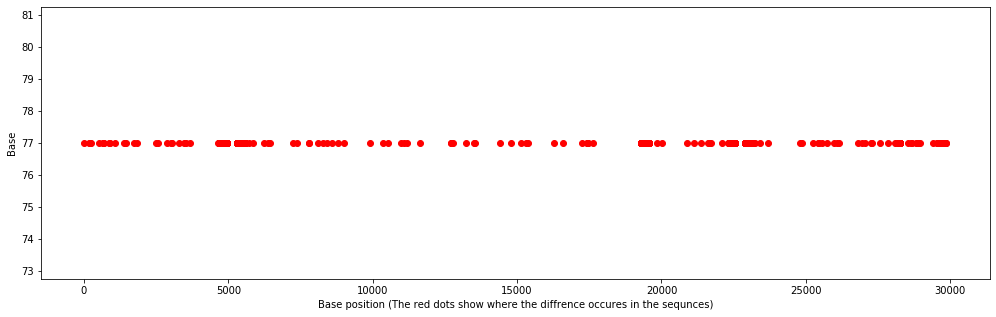

In [17]:
alignmentScore(germanMultiAlignment,colum,row)

### Mutation Percentage

In [16]:
# we choose Consensus sequnece as refrence sequence
refSeq=findConsensus(germanMultiAlignment,colum,row)
mutationPercent(germanMultiAlignment,colum,row,refSeq)

14408 >> 48.1 %
241 >> 29.9 %
1059 >> 29.9 %
3037 >> 29.9 %
23403 >> 29.9 %
25563 >> 29.9 %
1440 >> 19.5 %
2891 >> 19.5 %
5297 >> 19.5 %
5303 >> 19.5 %
5304 >> 19.5 %
5305 >> 19.5 %
5313 >> 19.5 %
5314 >> 19.5 %
5336 >> 19.5 %
5300 >> 18.2 %
5302 >> 18.2 %
5308 >> 18.2 %
5311 >> 18.2 %
5318 >> 18.2 %
5319 >> 18.2 %
5324 >> 18.2 %
5325 >> 18.2 %
5330 >> 18.2 %
5331 >> 18.2 %
5332 >> 18.2 %
5338 >> 18.2 %
5342 >> 18.2 %
5343 >> 18.2 %
5344 >> 18.2 %
5345 >> 18.2 %
5349 >> 18.2 %
5350 >> 18.2 %
5354 >> 18.2 %
5356 >> 18.2 %
5359 >> 18.2 %
5360 >> 18.2 %
5361 >> 18.2 %
5369 >> 18.2 %
5371 >> 18.2 %
5393 >> 18.2 %
5498 >> 18.2 %
23104 >> 18.2 %
23144 >> 18.2 %
5298 >> 16.9 %
5299 >> 16.9 %
5301 >> 16.9 %
5306 >> 16.9 %
5307 >> 16.9 %
5309 >> 16.9 %
5310 >> 16.9 %
5312 >> 16.9 %
5315 >> 16.9 %
5316 >> 16.9 %
5317 >> 16.9 %
5320 >> 16.9 %
5321 >> 16.9 %
5322 >> 16.9 %
5323 >> 16.9 %
5326 >> 16.9 %
5327 >> 16.9 %
5328 >> 16.9 %
5329 >> 16.9 %
5333 >> 16.9 %
5334 >> 16.9 %
5335 >> 16.9 %
5337 >

19317 >> 10.4 %
19318 >> 10.4 %
19319 >> 10.4 %
19320 >> 10.4 %
19321 >> 10.4 %
19322 >> 10.4 %
19323 >> 10.4 %
19324 >> 10.4 %
19325 >> 10.4 %
19326 >> 10.4 %
19327 >> 10.4 %
19328 >> 10.4 %
19330 >> 10.4 %
19331 >> 10.4 %
19332 >> 10.4 %
19333 >> 10.4 %
19334 >> 10.4 %
19335 >> 10.4 %
19336 >> 10.4 %
19337 >> 10.4 %
19338 >> 10.4 %
19339 >> 10.4 %
19340 >> 10.4 %
19341 >> 10.4 %
19342 >> 10.4 %
19343 >> 10.4 %
19345 >> 10.4 %
19346 >> 10.4 %
19347 >> 10.4 %
19348 >> 10.4 %
19349 >> 10.4 %
19350 >> 10.4 %
19351 >> 10.4 %
19352 >> 10.4 %
19353 >> 10.4 %
19354 >> 10.4 %
19355 >> 10.4 %
19356 >> 10.4 %
19357 >> 10.4 %
19358 >> 10.4 %
19359 >> 10.4 %
19360 >> 10.4 %
19361 >> 10.4 %
19362 >> 10.4 %
19363 >> 10.4 %
19364 >> 10.4 %
19365 >> 10.4 %
19366 >> 10.4 %
19367 >> 10.4 %
19368 >> 10.4 %
19369 >> 10.4 %
19370 >> 10.4 %
19371 >> 10.4 %
19372 >> 10.4 %
19373 >> 10.4 %
19374 >> 10.4 %
19375 >> 10.4 %
19376 >> 10.4 %
19377 >> 10.4 %
19378 >> 10.4 %
19379 >> 10.4 %
19380 >> 10.4 %
19381 >>

4943 >> 2.6 %
4944 >> 2.6 %
4945 >> 2.6 %
4946 >> 2.6 %
4947 >> 2.6 %
4948 >> 2.6 %
4949 >> 2.6 %
4950 >> 2.6 %
4951 >> 2.6 %
4952 >> 2.6 %
4953 >> 2.6 %
4954 >> 2.6 %
4955 >> 2.6 %
4956 >> 2.6 %
4957 >> 2.6 %
4958 >> 2.6 %
4959 >> 2.6 %
4960 >> 2.6 %
4961 >> 2.6 %
4962 >> 2.6 %
4963 >> 2.6 %
4964 >> 2.6 %
4965 >> 2.6 %
4966 >> 2.6 %
6228 >> 2.6 %
8422 >> 2.6 %
17410 >> 2.6 %
29546 >> 2.6 %
29688 >> 2.6 %
29712 >> 2.6 %
29755 >> 2.6 %
29777 >> 2.6 %
29807 >> 2.6 %
29808 >> 2.6 %
29812 >> 2.6 %
160 >> 1.3 %
210 >> 1.3 %
514 >> 1.3 %
675 >> 1.3 %
682 >> 1.3 %
884 >> 1.3 %
900 >> 1.3 %
1397 >> 1.3 %
1736 >> 1.3 %
3011 >> 1.3 %
3283 >> 1.3 %
3451 >> 1.3 %
3518 >> 1.3 %
3675 >> 1.3 %
5293 >> 1.3 %
5294 >> 1.3 %
5295 >> 1.3 %
5296 >> 1.3 %
5714 >> 1.3 %
5861 >> 1.3 %
6362 >> 1.3 %
7235 >> 1.3 %
7392 >> 1.3 %
7788 >> 1.3 %
7798 >> 1.3 %
8109 >> 1.3 %
8293 >> 1.3 %
8599 >> 1.3 %
8782 >> 1.3 %
9019 >> 1.3 %
9891 >> 1.3 %
10356 >> 1.3 %
10524 >> 1.3 %
10969 >> 1.3 %
11182 >> 1.3 %
11638 >> 1.3 %

## German With Chinese as Ref

In [23]:
# Redigne Multialignmet file that we've generated
germanWithChineseMultiAlignment = AlignIO.read("MiltiAlignment Files\German with chinese.aln", "clustal")

print("Alignment length %i" % germanWithChineseMultiAlignment.get_alignment_length())
print("Samples",np.size(germanWithChineseMultiAlignment,0)-1,)
print("\n")
for record in germanWithChineseMultiAlignment:
    print("%s - %s" % (record.seq, record.id))
np.size(germanWithChineseMultiAlignment,1)
#testAlignment[1,91]


Alignment length 29903
Samples 77


ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAA

29903

### Mutation Percentage
      

In [25]:

# we choose Chinese sequnece as refrence sequence
for record in germanWithChineseMultiAlignment:
    s="%s" % (record.id)
    if s=='NC_045512.2':
        chineseSeq="%s" % (record.seq)
        break

refSeq=chineseSeq
mutationPercent(germanWithChineseMultiAlignment,colum,row,refSeq)

3037 >> 72.7 %
23403 >> 72.7 %
241 >> 71.4 %
14408 >> 54.5 %
1059 >> 29.9 %
25563 >> 29.9 %
5297 >> 19.5 %
5303 >> 19.5 %
5304 >> 19.5 %
5305 >> 19.5 %
5313 >> 19.5 %
5314 >> 19.5 %
5336 >> 19.5 %
1440 >> 18.2 %
2891 >> 18.2 %
5300 >> 18.2 %
5302 >> 18.2 %
5308 >> 18.2 %
5311 >> 18.2 %
5318 >> 18.2 %
5319 >> 18.2 %
5324 >> 18.2 %
5325 >> 18.2 %
5330 >> 18.2 %
5331 >> 18.2 %
5332 >> 18.2 %
5338 >> 18.2 %
5342 >> 18.2 %
5343 >> 18.2 %
5344 >> 18.2 %
5345 >> 18.2 %
5349 >> 18.2 %
5350 >> 18.2 %
5354 >> 18.2 %
5356 >> 18.2 %
5359 >> 18.2 %
5360 >> 18.2 %
5361 >> 18.2 %
5369 >> 18.2 %
5371 >> 18.2 %
5393 >> 18.2 %
5498 >> 18.2 %
23104 >> 18.2 %
23144 >> 18.2 %
5298 >> 16.9 %
5299 >> 16.9 %
5301 >> 16.9 %
5306 >> 16.9 %
5307 >> 16.9 %
5309 >> 16.9 %
5310 >> 16.9 %
5312 >> 16.9 %
5315 >> 16.9 %
5316 >> 16.9 %
5317 >> 16.9 %
5320 >> 16.9 %
5321 >> 16.9 %
5322 >> 16.9 %
5323 >> 16.9 %
5326 >> 16.9 %
5327 >> 16.9 %
5328 >> 16.9 %
5329 >> 16.9 %
5333 >> 16.9 %
5334 >> 16.9 %
5335 >> 16.9 %
5337 >

19354 >> 10.4 %
19355 >> 10.4 %
19356 >> 10.4 %
19357 >> 10.4 %
19358 >> 10.4 %
19359 >> 10.4 %
19360 >> 10.4 %
19361 >> 10.4 %
19362 >> 10.4 %
19363 >> 10.4 %
19364 >> 10.4 %
19365 >> 10.4 %
19366 >> 10.4 %
19367 >> 10.4 %
19368 >> 10.4 %
19369 >> 10.4 %
19370 >> 10.4 %
19371 >> 10.4 %
19372 >> 10.4 %
19373 >> 10.4 %
19374 >> 10.4 %
19375 >> 10.4 %
19376 >> 10.4 %
19377 >> 10.4 %
19378 >> 10.4 %
19379 >> 10.4 %
19380 >> 10.4 %
19381 >> 10.4 %
19382 >> 10.4 %
19383 >> 10.4 %
19384 >> 10.4 %
19385 >> 10.4 %
19386 >> 10.4 %
19387 >> 10.4 %
19388 >> 10.4 %
19389 >> 10.4 %
19390 >> 10.4 %
19391 >> 10.4 %
19392 >> 10.4 %
19395 >> 10.4 %
19396 >> 10.4 %
19397 >> 10.4 %
19398 >> 10.4 %
19399 >> 10.4 %
19400 >> 10.4 %
19401 >> 10.4 %
19402 >> 10.4 %
19403 >> 10.4 %
19404 >> 10.4 %
19405 >> 10.4 %
19406 >> 10.4 %
19407 >> 10.4 %
19408 >> 10.4 %
19409 >> 10.4 %
19410 >> 10.4 %
19411 >> 10.4 %
19412 >> 10.4 %
19413 >> 10.4 %
19414 >> 10.4 %
19415 >> 10.4 %
19416 >> 10.4 %
19417 >> 10.4 %
19418 >>

4855 >> 2.6 %
4856 >> 2.6 %
4857 >> 2.6 %
4858 >> 2.6 %
4859 >> 2.6 %
4860 >> 2.6 %
4861 >> 2.6 %
4862 >> 2.6 %
4863 >> 2.6 %
4864 >> 2.6 %
4865 >> 2.6 %
4866 >> 2.6 %
4867 >> 2.6 %
4868 >> 2.6 %
4869 >> 2.6 %
4870 >> 2.6 %
4871 >> 2.6 %
4872 >> 2.6 %
4873 >> 2.6 %
4874 >> 2.6 %
4875 >> 2.6 %
4876 >> 2.6 %
4877 >> 2.6 %
4878 >> 2.6 %
4879 >> 2.6 %
4880 >> 2.6 %
4881 >> 2.6 %
4882 >> 2.6 %
4883 >> 2.6 %
4884 >> 2.6 %
4885 >> 2.6 %
4887 >> 2.6 %
4888 >> 2.6 %
4889 >> 2.6 %
4890 >> 2.6 %
4891 >> 2.6 %
4892 >> 2.6 %
4893 >> 2.6 %
4894 >> 2.6 %
4895 >> 2.6 %
4896 >> 2.6 %
4897 >> 2.6 %
4898 >> 2.6 %
4899 >> 2.6 %
4900 >> 2.6 %
4901 >> 2.6 %
4902 >> 2.6 %
4903 >> 2.6 %
4904 >> 2.6 %
4905 >> 2.6 %
4906 >> 2.6 %
4907 >> 2.6 %
4908 >> 2.6 %
4909 >> 2.6 %
4910 >> 2.6 %
4911 >> 2.6 %
4912 >> 2.6 %
4913 >> 2.6 %
4914 >> 2.6 %
4915 >> 2.6 %
4916 >> 2.6 %
4917 >> 2.6 %
4918 >> 2.6 %
4919 >> 2.6 %
4920 >> 2.6 %
4921 >> 2.6 %
4922 >> 2.6 %
4923 >> 2.6 %
4924 >> 2.6 %
4925 >> 2.6 %
4926 >> 2.6 %
4927 >

# Italian

In [ ]:
# Redigne Multialignmet file that we've generated
italianMultiAlignment = AlignIO.read("MiltiAlignment Files\italian.aln", "clustal")

print("Alignment length %i" % italianMultiAlignment.get_alignment_length())
print("Samples",np.size(italianMultiAlignment,0)-1,)
print("\n")
for record in italianMultiAlignment:
    print("%s - %s" % (record.seq, record.id))
np.size(italianMultiAlignment,1)
#testAlignment[1,91]

### Finding concensus

In [ ]:
colum=np.size (italianMultiAlignment,1)
row=np.size (italianMultiAlignment,0)

s=findConsensus(italianMultiAlignment,colum,row)
#print(s[5])
print(findConsensus(italianMultiAlignment,colum,row),'| Consensus')

### Finding mutation

In [ ]:
alignmentScore(italianMultiAlignment,colum,row)

### Mutation Percentage

In [ ]:
# we choose Consensus sequnece as refrence sequence
refSeq=findConsensus(italianMultiAlignment,colum,row)
mutationPercent(italianMultiAlignment,colum,row,refSeq)

## Italian With Chinese as Ref

In [ ]:
# Redigne Multialignmet file that we've generated
italianWithChineseMultiAlignment = AlignIO.read("MiltiAlignment Files\Italian with chinese.aln", "clustal")

print("Alignment length %i" % italianWithChineseMultiAlignment.get_alignment_length())
print("Samples",np.size(italianWithChineseMultiAlignment,0)-1,)
print("\n")
for record in italianWithChineseMultiAlignment:
    print("%s - %s" % (record.seq, record.id))
np.size(italianWithChineseMultiAlignment,1)
#testAlignment[1,91]


### Mutation Percentage

In [ ]:

# we choose Chinese sequnece as refrence sequence
for record in italianWithChineseMultiAlignment:
    s="%s" % (record.id)
    if s=='NC_045512.2':
        chineseSeq="%s" % (record.seq)
        break

refSeq=chineseSeq
mutationPercent(italianWithChineseMultiAlignment,colum,row,refSeq)

# Italian + German 

In [ ]:
# Redigne Multialignmet file that we've generated
italianAndGermanMultiAlignment = AlignIO.read("MiltiAlignment Files\Italian & German.aln", "clustal")

print("Alignment length %i" % italianAndGermanMultiAlignment.get_alignment_length())
print("Samples",np.size(italianAndGermanMultiAlignment,0)-1,)
print("\n")
for record in italianAndGermanMultiAlignment:
    print("%s - %s" % (record.seq, record.id))
np.size(italianAndGermanMultiAlignment,1)
#testAlignment[1,91]

### Finding concensus

In [ ]:
colum=np.size (italianAndGermanMultiAlignment,1)
row=np.size (italianAndGermanMultiAlignment,0)

s=findConsensus(italianAndGermanMultiAlignment,colum,row)
#print(s[5])
print(findConsensus(italianAndGermanMultiAlignment,colum,row),'| Consensus')

### Finding mutation

In [ ]:
alignmentScore(italianAndGermanMultiAlignment,colum,row)

### Mutation Percentage

In [ ]:
# we choose Consensus sequnece as refrence sequence
refSeq=findConsensus(italianAndGermanMultiAlignment,colum,row)
mutationPercent(italianAndGermanMultiAlignment,colum,row,refSeq)

## German+Italian With Chinese as Ref

In [ ]:
# Redigne Multialignmet file that we've generated
italianAndGermanWithChineseMultiAlignment = AlignIO.read("MiltiAlignment Files\Italian & German with chinese.aln", "clustal")

print("Alignment length %i" % italianAndGermanWithChineseMultiAlignment.get_alignment_length())
print("Samples",np.size(italianAndGermanWithChineseMultiAlignment,0)-1,)
print("\n")
for record in italianAndGermanWithChineseMultiAlignment:
    print("%s - %s" % (record.seq, record.id))
np.size(italianAndGermanWithChineseMultiAlignment,1)
#testAlignment[1,91]


### Mutation Percentage

In [ ]:
# we choose Chinese sequnece as refrence sequence
for record in italianAndGermanWithChineseMultiAlignment:
    s="%s" % (record.id)
    if s=='NC_045512.2':
        chineseSeq="%s" % (record.seq)
        break

refSeq=chineseSeq
mutationPercent(italianAndGermanWithChineseMultiAlignment,colum,row,refSeq)